# Importing dataset and libraries

In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

dataset = pd.concat(
    [
        pd.read_csv(
            "../input/crimes-in-chicago/Chicago_Crimes_2005_to_2007.csv",
            error_bad_lines=False,
        ),
        pd.read_csv(
            "../input/crimes-in-chicago/Chicago_Crimes_2008_to_2011.csv",
            error_bad_lines=False,
        ),
        pd.read_csv(
            "../input/crimes-in-chicago/Chicago_Crimes_2012_to_2017.csv",
            error_bad_lines=False,
        ),
    ]
)
dataset.info()

b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017767 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  int64  
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
dtypes: bool

# EDA & Dataset


<div>
    <div style="float:left;margin-right:155px">
        <img src="https://upload.wikimedia.org/wikipedia/commons/3/3e/Chicago_Community_Areas.svg" alt="Chicago Community Areas" width="500">
    </div>
        <div>
<p>This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to present, minus the most recent seven days. Data is extracted from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system. In order to protect the privacy of crime victims, addresses are shown at the block level only and specific locations are not identified. Should you have questions about this dataset, you may contact the Research & Development Division of the Chicago Police Department at 312.745.6071 or RDAnalysis@chicagopolice.org. Disclaimer: These crimes may be based upon preliminary information supplied to the Police Department by the reporting parties that have not been verified. The preliminary crime classifications may be changed at a later date based upon additional investigation and there is always the possibility of mechanical or human error. Therefore, the Chicago Police Department does not guarantee (either expressed or implied) the accuracy, completeness, timeliness, or correct sequencing of the information and the information should not be used for comparison purposes over time. The Chicago Police Department will not be responsible for any error or omission, or for the use of, or the results obtained from the use of this information. All data visualizations on maps should be considered approximate and attempts to derive specific addresses are strictly prohibited. The Chicago Police Department is not responsible for the content of any off-site pages that are referenced by or that reference this web page other than an official City of Chicago or Chicago Police Department web page. The user specifically acknowledges that the Chicago Police Department is not responsible for any defamatory, offensive, misleading, or illegal conduct of other users, links, or third parties and that the risk of injury from the foregoing rests entirely with the user. The unauthorized use of the words "Chicago Police Department," "Chicago Police," or any colorable imitation of these words or the unauthorized use of the Chicago Police Department logo is unlawful. This web page does not, in any way, authorize such use. Data are updated daily. The dataset contains more than 6,000,000 records/rows of data and cannot be viewed in full in Microsoft Excel. To access a list of Chicago Police Department - Illinois Uniform Crime Reporting (IUCR) codes, go to <a href="http://data.cityofchicago.org/Public-Safety/Chicago-Police-Department-Illinois-Uniform-Crime-R/c7ck-438e">here</a>.</p>

</div>


Initial dataset shape.

In [2]:
print('Dataset shape ->', dataset.shape)
dataset.head()

Dataset shape -> (6017767, 23)


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


How many missing values we have per columns.

In [3]:
dataset.isna().sum()

Unnamed: 0                  0
ID                          0
Case Number                 7
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1974
Arrest                      0
Domestic                    0
Beat                        0
District                   89
Ward                       92
Community Area           1844
FBI Code                    0
X Coordinate            74882
Y Coordinate            74882
Year                        0
Updated On                  0
Latitude                74882
Longitude               74882
Location                74882
dtype: int64

Selecting a few columsn do be used during the exploratory data analysis.

Removing the year 2017 due be is not full.

In [4]:
data_ead = dataset[dataset.Year != 2017].drop(
    [
        "Unnamed: 0",
        "ID",
        "IUCR",
        "Beat",
        "Case Number",
        "District",
        "Ward",
        "Updated On",
        "Year",
        "Community Area",
        "X Coordinate",
        "Y Coordinate",
        "Latitude",
        "Longitude",
        "Location",
        "FBI Code",
    ],
    axis=1,
)

Transforming the Date in Datetime...

In [5]:
data_ead.Date = pd.to_datetime(data_ead.Date, format="%m/%d/%Y %I:%M:%S %p")
data_ead.set_index("Date", inplace=True)

## Number of cases by type

In this part, let's try to indentify the tend and highpoints or lowpoints.

### Primary Type

In [6]:
# Function to plot the serie value_counts
def plot_counts(serie, title):
    df = pd.DataFrame(serie.value_counts()[:15])
    df.columns = ["Freq"]
    df["Type"] = df.index
    fig = px.bar(df, y="Freq", x="Type", text="Freq", color="Freq", color_continuous_scale=px.colors.sequential.Blugrn)
    fig.update_traces(texttemplate="%{text:.2s}", textposition="outside")
    fig.update_layout(uniformtext_minsize=8, uniformtext_mode="hide")
    fig.update_layout(title_text=title)
    fig.show()


plot_counts(data_ead["Primary Type"], "Kind of Crimes")

THEFT, BATTERY, CRIMINAL DAMAGE and NARCOTICS represents more the 65% of the crimes. 

### Location Description
Where those crimes happens? 

In [7]:
plot_counts(data_ead["Location Description"], "Location of Crimes")

STREET and SIDEWALK represents more the 1/3 of the crimes. 

## Number of cases per Year x Months
Let's see the number of crimes per Year and Months...

In [8]:
aux = pd.DataFrame(data_ead.resample("M").size(), columns=["Number of cases"])
aux["Month"] = aux.index.month.astype(str)
aux["Year"] = aux.index.year.astype(str)
aux["Year-Month"] = aux["Year"].str.cat(aux["Month"].str.zfill(2), sep="-")
aux.head()

,Number of cases,Month,Year,Year-Month
Date,,,,
2005-01-31,33983,1,2005,2005-01
2005-02-28,32042,2,2005,2005-02
2005-03-31,36970,3,2005,2005-03
2005-04-30,38963,4,2005,2005-04
2005-05-31,40572,5,2005,2005-05


### by Heatmap

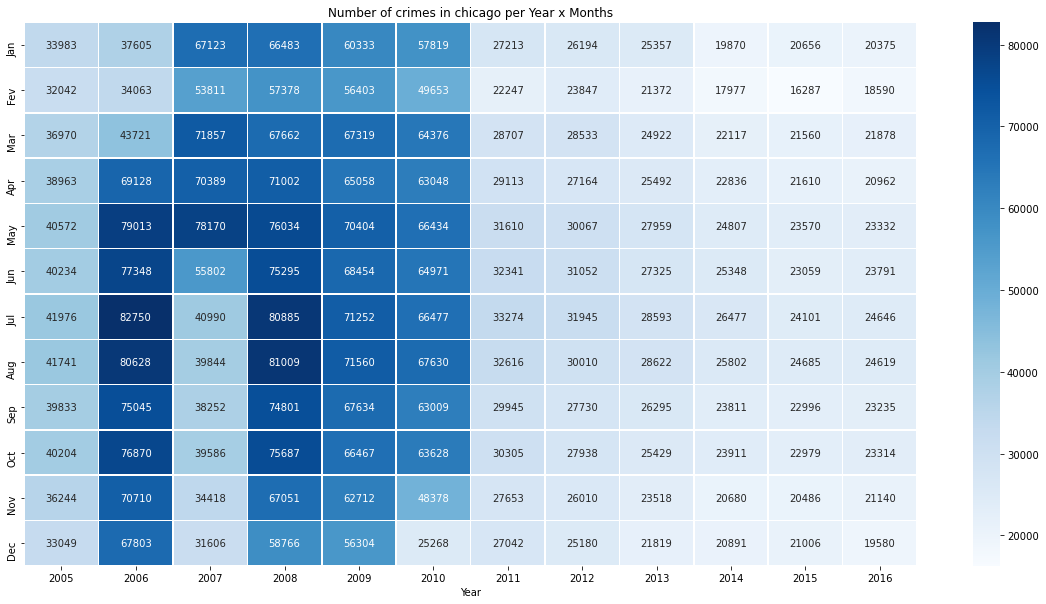

In [9]:
aux_csm = aux[["Month", "Year", "Number of cases"]]
aux_csm = aux_csm.pivot("Month", "Year", "Number of cases").fillna(0).astype(int)
aux_csm.index = aux_csm.index.astype(int)
aux_csm = aux_csm.sort_index()
aux_csm.index = ['Jan', 'Fev', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(20, 10))
_ = sns.heatmap(
    aux_csm,
    annot=True,
    fmt="d",
    linewidths=0.5,
    cmap="Blues",
).set_title('Number of crimes in chicago per Year x Months')

The years between 2006 and 2010 were a tough time, the year 2008 was the worst with a mean of 71004 crimes per month, and the best year was the 2015 with a mean of 21916 crimes per month.

### by Bars 

In [10]:
fig = px.bar(
    aux,
    x="Year-Month",
    y="Number of cases",
    hover_data=["Year", "Month", "Number of cases"],
    color="Number of cases",
    height=600,
    width=1400,
    color_continuous_scale=px.colors.sequential.Blugrn

)
fig.update_layout(title_text='Crime counts per year-month in bars')
fig.show()

Similar graph but using bars to visualize. Again the 'tough time' during 2006 until 2010. 



### Agregate by Months


In [11]:
agg_months = aux.groupby(['Month'])['Number of cases'].sum().reset_index()
agg_months.Month = agg_months.Month.astype(int)
agg_months.sort_values('Month',inplace=True)
agg_months.Month = ['Jan', 'Fev', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig = px.bar(
    agg_months,
    x="Month",
    y="Number of cases",
    color="Number of cases",
    text="Number of cases",
    height=600,
    width=1400,
    color_continuous_scale=px.colors.sequential.Blugrn
)
fig.update_traces(texttemplate="%{text:.2s}", textposition="outside")
fig.update_layout(title_text="Crime counts per year-month in stacked bars (Month)")
fig.show()

Looks like in the summer have a tend for more crimes in chicago.

### Agregate by Year

In [12]:
fig = px.bar(
    aux.groupby(['Year'])['Number of cases'].sum().reset_index(),
    x="Year",
    y="Number of cases",
    color="Number of cases",
    text="Number of cases",
    height=600,
    width=1400,
        color_continuous_scale=px.colors.sequential.Blugrn

)
fig.update_traces(texttemplate="%{text:.2s}", textposition="outside")
fig.update_layout(title_text="Crime counts per year-month in stacked bars (Years)")

fig.show()

Similar graph but using bars to visualize. Again the 'tough time' during 2006 until 2010. 


## Map plot

There is some area or specific location that used to happen crimes? 

In [13]:
map_marks = dataset[['Latitude', 'Longitude']]
map_marks['Year'] =  pd.to_datetime(dataset.Date, format="%m/%d/%Y %I:%M:%S %p").dt.year
map_marks = map_marks.dropna()
map_marks.head()

,Latitude,Longitude,Year
0,41.981913,-87.771996,2006
1,41.775733,-87.611920,2006
2,41.769897,-87.593671,2006
3,41.942984,-87.780057,2006
4,41.784211,-87.716745,2006


In [14]:
fig = px.scatter_mapbox(map_marks[map_marks.Year == 2016].sample(5000), lat="Latitude", lon="Longitude",
                        color_discrete_sequence=["fuchsia"], zoom=9, height=650)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


Look like there is crime everywhere in Chicago, in the centre, you can see more points but also is a crowded place.

## Arrested?
What is the arrested rate per crime?

In [15]:
aux = data_ead.groupby('Primary Type')['Arrest'].mean().reset_index()
aux['Arrest (%)'] = aux['Arrest'].round(4)*100
aux.sort_values('Arrest', inplace=True)
fig = px.bar(
    aux,
    orientation='h',
    x="Arrest (%)",
    y="Primary Type",
    color="Arrest (%)",
    text="Arrest (%)",
    height=800,
    #width=800,
        color_continuous_scale=px.colors.sequential.Blugrn

)
fig.update_traces(texttemplate="%{text:.4s}", textposition="outside")
fig.update_layout(title_text="Arrested Rate in % per Type Crime in Chicago.")

fig.show()

The “VIOLATION” crimes look strongly correlated to the arrested rate once the 'cop' must be present in the location to declare the violation. 

# Model - Forecast

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

In [16]:
data_time = dataset.drop(
    [
        "Unnamed: 0",
        "ID",
        "IUCR",
        "Beat",
        "Case Number",
        "District",
        "Ward",
        "Updated On",
        "Year",
        "Community Area",
        "X Coordinate",
        "Y Coordinate",
        "Latitude",
        "Longitude",
        "Location",
        "FBI Code",
    ],
    axis=1,
)
data_time.Date = pd.to_datetime(data_time.Date, format="%m/%d/%Y %I:%M:%S %p")
data_time.set_index('Date', inplace=True)
data_time.sample(3)

,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,
2007-02-14 18:50:00,081XX S STATE ST,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False
2008-02-08 00:09:49,072XX S UNION AVE,NARCOTICS,POSS: CRACK,STREET,True,False
2006-07-12 12:33:00,022XX N MAPLEWOOD AVE,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,APARTMENT,True,False


In [17]:
data_model = pd.DataFrame(data_time.resample("M").size().reset_index())
data_model.columns = ["ds", "y"]
print(data_model.shape)
data_model.head()

(145, 2)


,ds,y
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572


### What is the period?

First of all, let's plot the whole series to see the data behaviour.

In [18]:
fig = px.line(data_model, x="ds", y="y")
fig.update_layout(
    title="Chicago crimes from 2005 to 2016 (counted per Month).",
    xaxis_title="Date",
    yaxis_title="Crimes",
    font=dict(
        size=14,
    )
)

In this time series we have the crimes per month, a total per month.

### Modeling

In [19]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_plotly, plot_components_plotly
from sklearn.metrics import mean_squared_error
from joblib import Parallel, delayed
import itertools


def create_param_combinations(**param_dict):
    param_iter = itertools.product(*param_dict.values())
    params = []
    for param in param_iter:
        params.append(param)
    params_df = pd.DataFrame(params, columns=list(param_dict.keys()))
    return params_df


def train_return_results(params):
    model = Prophet(**params)
    model.fit(data_model[75:-6])

    future = model.make_future_dataframe(periods=6, freq="M")
    forecast = model.predict(future)

    return mean_squared_error(data_model["y"][-6:], forecast["yhat"][-6:])


param_grid = {
    "changepoint_prior_scale": [0.005, 0.05, 0.5, 5],
    "changepoint_range": [0.8, 0.9],
    "seasonality_prior_scale": [0.1, 1, 10.0],
    "holidays_prior_scale": [0.1, 1, 10.0],
    "seasonality_mode": ["multiplicative", "additive"],
    # "growth": ["linear", "logistic"],
    "yearly_seasonality": [5, 10, 20],
}

# Generate all combinations of parameters
all_params = create_param_combinations(**param_grid)

# Use cross validation to evaluate all parameters
rmses = Parallel(n_jobs=-1, verbose=10)(
    delayed(train_return_results)(dict(zip(all_params.keys(), param)))
    for param in all_params.values
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   57.9s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  3

In [20]:
all_params["rsme"] = rmses
best_paramers = dict(all_params.sort_values("rsme").drop("rsme", axis=1).iloc[0])
print(best_paramers)

{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.9, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 10.0, 'seasonality_mode': 'additive', 'yearly_seasonality': 5}


In [21]:
model = Prophet(**best_paramers)
model.fit(data_model[75:])

future = model.make_future_dataframe(periods=5, freq="M")
forecast = model.predict(future)

## Result plot

In [22]:
plot_plotly(model, forecast)

The model adapted well to this part of it, the sasionality is clear in the graph and also we can see a decrease trend.

In [23]:
plot_components_plotly(model, forecast)

There is a reduction trend and the sasionality is strong in the first part of the year.

In [24]:
forecast.tail(6)[['ds','yhat','yhat_lower','yhat_upper']].round()

,ds,yhat,yhat_lower,yhat_upper
69,2017-01-31,15705.0,14549.0,16860.0
70,2017-02-28,13942.0,12817.0,15144.0
71,2017-03-31,17383.0,16146.0,18573.0
72,2017-04-30,17225.0,16109.0,18408.0
73,2017-05-31,18908.0,17763.0,20104.0
74,2017-06-30,19197.0,17974.0,20391.0


In [25]:
yhat = str(int(forecast.iloc[-1]['yhat']))
yhat_lower = str(int(forecast.iloc[-1]['yhat_lower']))
yhat_upper = str(int(forecast.iloc[-1]['yhat_upper']))
print('Following the model, for July we have', yhat ,"crimes and considering the error margin it's possible to have a value between",yhat_lower, '~', yhat_upper,'.')

Following the model, for July we have 19197 crimes and considering the error margin it's possible to have a value between 17973 ~ 20390 .
